In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install adjustText
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9c30ff2147e0e85e1c6d5d9cef70bc3852d6648d9a4a95b7bf9850c46805a6a1
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel 

In [3]:
import pandas as pd
from pathlib import Path

DATA = Path("/content/drive/My Drive/F23/ECBME4060/data/project")


#Mutual Exclusivity Analysis

# Binary Matrix Construction

In [4]:
import pandas as pd

# Import the data
datamutations = pd.read_csv(DATA / "data_mutationslaml.txt", sep='\t')

# Get unique patients and genes
patients = datamutations['Tumor_Sample_Barcode'].unique()[0:]
numpatients = len(patients)
genes = datamutations['Hugo_Symbol'].unique()[0:]
numgenes = len(genes)

# Create a binary matrix
binarymatrix = pd.DataFrame(0, index=patients, columns=genes)

# Populate the binary matrix
for i in range(1, len(datamutations)):
    gene = datamutations.loc[i, 'Hugo_Symbol']
    patient = datamutations.loc[i, 'Tumor_Sample_Barcode']

    if gene in genes and patient in patients:
        binarymatrix.loc[patient, gene] = 1

<ipython-input-4-20bbcd7f858e>:4: DtypeWarning: Columns (33,34,35,36,45) have mixed types. Specify dtype option on import or set low_memory=False.
  datamutations = pd.read_csv(DATA / "data_mutationslaml.txt", sep='\t')


In [5]:
binarymatrix.head()

,TBX15,TCHHL1,DNMT3A,IDH1,GRM7,ANKRD30A,KRT74,PTPN11,EP400,RP11-815J4.6,...,ACAA1,POLR2B,CDKL3,ERBB2IP,PLAA,APOOL,PCSK2,C4orf29,CLEC7A,CALCR
TCGA-AB-2802-03,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2803-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2804-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2805-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2806-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(binarymatrix.shape)

(199, 6427)


There are 199 unique patients and 6427 unique mutated genes.

In [7]:
pip install numpy scipy statsmodels

# First Round of Fisher's Exact Tests

In [8]:
import numpy as np
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
import time

# Fisher's exact tests for each pair of columns
start_time = time.time()

# find tp53 in binary matrix
# list of pval from fisher exact test of tp53 vs every other genes
# contingency table is 2 by 2 table with each value is the sum of samples with mutation in both/either/neither
# A --> muated A^c --> not mutated
# B 00> mutated B^c -->. not mutated
# Loop through every pair of genes

fisher_exact_res = pd.DataFrame(index=binarymatrix.columns, columns=['pval', 'odd'])
binarydatmat = pd.DataFrame(binarymatrix, index=patients, columns=genes)
binarymatrix_upd = binarydatmat.copy()
tp53ind = np.where(binarydatmat.columns == "TP53")[0][0]

def calculate_fisher_exact(i, j, bin):
    col_i = bin.iloc[:, i].astype(bool)
    col_j = bin.iloc[:, j].astype(bool)
    contingency_table = np.array([[np.sum(col_i & ~col_j), np.sum(col_i & col_j)],
                                  [np.sum(~col_i & ~col_j), np.sum(~col_i & col_j)]])
    odd_ratio, p_value = fisher_exact(contingency_table)
    return p_value, odd_ratio


for index in fisher_exact_res.index:
    j = fisher_exact_res.index.get_loc(index)
    p_value, odds_ratio = calculate_fisher_exact(tp53ind, j, binarydatmat)

    # Assign the p-value and odds ratio to the corresponding rows in the DataFrame
    fisher_exact_res.at[index, 'pval'] = p_value
    fisher_exact_res.at[index, 'odd'] = odds_ratio

sortedby_pval=fisher_exact_res.sort_values(by='pval')
sortedby_pval['log2odd'] = sortedby_pval.odd.apply(lambda x:np.log2(x))
mut_exc_genes = sortedby_pval[sortedby_pval.log2odd>=0]
me_gene = mut_exc_genes.index[0]
binarymatrix_upd = binarydatmat.copy()
binarymatrix_upd['TP53_upd'] = np.where((binarydatmat['TP53'] == 0) & (binarymatrix[me_gene] == 0), 0, 1)
binarymatrix_upd = binarymatrix_upd.drop(columns = ['TP53', me_gene])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for 1st round: {elapsed_time} seconds")
print(f"Mutually exclusive gene: ", me_gene)

Time taken for 1st round: 28.277645587921143 seconds
Mutually exclusive gene:  FLT3


In [9]:
mut_exc_genes.head(10)

,pval,odd,log2odd
FLT3,0.003618,inf,inf
NPM1,0.007105,inf,inf
IDH2,0.227614,inf,inf
TTN,0.370052,inf,inf
IDH1,0.372946,inf,inf
RUNX1,0.372946,inf,inf
DNMT3A,0.564838,1.674242,0.743508
WT1,0.605294,inf,inf
TAGAP,1.0,inf,inf
RPGR,1.0,inf,inf


In [10]:
sortedby_pval['exclusive'] = sortedby_pval['log2odd'] >= 0

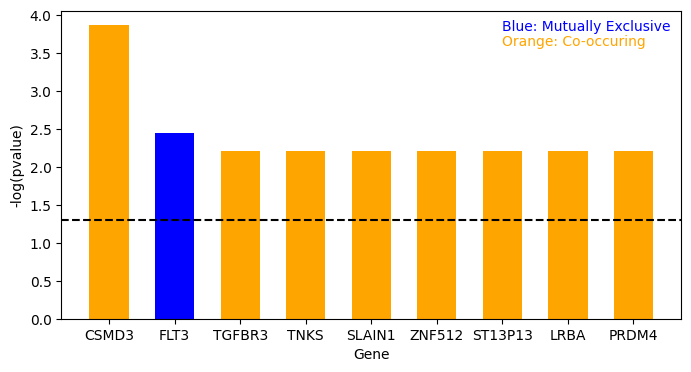

In [11]:
import matplotlib.pyplot as plt

colors = sortedby_pval['exclusive'][1:10].map({True: 'blue', False: 'orange'})
plt.figure(figsize=(8,4))
plt.bar(sortedby_pval.index[1:10], sortedby_pval.pval[1:10].apply(lambda x:-np.log10(x)), color = colors, width = 0.6)

plt.xlabel('Gene')
plt.ylabel('-log(pvalue)')
plt.axhline(1.301,color="black",linestyle="--")
plt.text(6,3.8,'Blue: Mutually Exclusive', color='blue')
plt.text(6,3.6,'Orange: Co-occuring', color='orange')

plt.show()

# Second round

In [12]:
start_time = time.time()

fisher_exact_res = pd.DataFrame(index=binarymatrix_upd.columns, columns=['pval', 'odd'])

tp53ind = np.where(binarymatrix_upd.columns == "TP53_upd")[0][0]


for index in fisher_exact_res.index:
    j = fisher_exact_res.index.get_loc(index)
    p_value, odds_ratio = calculate_fisher_exact(tp53ind, j, binarymatrix_upd)

    fisher_exact_res.at[index, 'pval'] = p_value
    fisher_exact_res.at[index, 'odd'] = odds_ratio

sortedby_pval=fisher_exact_res.sort_values(by='pval')
sortedby_pval['log2odd'] = sortedby_pval.odd.apply(lambda x:np.log2(x))
mut_exc_genes = sortedby_pval[sortedby_pval.log2odd>=0]
me_gene = mut_exc_genes.index[0]
binarymatrix_upd['TP53_upd2'] = np.where((binarymatrix_upd['TP53_upd'] == 0) & (binarymatrix_upd[me_gene] == 0), 0, 1)
binarymatrix_upd = binarymatrix_upd.drop(columns = ['TP53_upd', me_gene])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for 2nd round: {elapsed_time} seconds")
print(f"Mutually exclusive gene: ", me_gene)

Time taken for 2nd round: 29.97687077522278 seconds
Mutually exclusive gene:  RUNX1


In [13]:
mut_exc_genes.head(10)

,pval,odd,log2odd
RUNX1,0.001958,12.566038,3.651458
IDH2,0.003958,6.604762,2.723507
KRAS,0.014452,inf,inf
U2AF1,0.025785,inf,inf
ASXL1,0.046384,inf,inf
PKHD1,0.085155,inf,inf
PCLO,0.085155,inf,inf
LNX1,0.085155,inf,inf
DYSF,0.085155,inf,inf
MED12,0.085155,inf,inf


# Third Round

In [14]:
start_time = time.time()

fisher_exact_res = pd.DataFrame(index=binarymatrix_upd.columns, columns=['pval', 'odd'])

tp53ind = np.where(binarymatrix_upd.columns == "TP53_upd2")[0][0]


for index in fisher_exact_res.index:
    j = fisher_exact_res.index.get_loc(index)
    p_value, odds_ratio = calculate_fisher_exact(tp53ind, j, binarymatrix_upd)

    fisher_exact_res.at[index, 'pval'] = p_value
    fisher_exact_res.at[index, 'odd'] = odds_ratio

sortedby_pval=fisher_exact_res.sort_values(by='pval')
sortedby_pval['log2odd'] = sortedby_pval.odd.apply(lambda x:np.log2(x))
mut_exc_genes = sortedby_pval[sortedby_pval.log2odd>=0]
me_gene = mut_exc_genes.index[0]
binarymatrix_upd['TP53_upd3'] = np.where((binarymatrix_upd['TP53_upd2'] == 0) & (binarymatrix_upd[me_gene] == 0), 0, 1)
binarymatrix_upd = binarymatrix_upd.drop(columns = ['TP53_upd2', me_gene])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for 3rd round: {elapsed_time} seconds")
print(f"Mutually exclusive gene: ", me_gene)

Time taken for 3rd round: 17.16221570968628 seconds
Mutually exclusive gene:  KRAS


In [15]:
mut_exc_genes.head(10)

,pval,odd,log2odd
KRAS,0.020971,8.536082,3.093574
PKHD1,0.030876,inf,inf
MYCBP2,0.030876,inf,inf
LNX1,0.030876,inf,inf
FRYL,0.062013,inf,inf
MAGI2,0.062013,inf,inf
CMYA5,0.062013,inf,inf
CHL1,0.062013,inf,inf
DOPEY2,0.062013,inf,inf
MYH13,0.062013,inf,inf


# Fourth round

In [16]:
start_time = time.time()

fisher_exact_res = pd.DataFrame(index=binarymatrix_upd.columns, columns=['pval', 'odd'])

tp53ind = np.where(binarymatrix_upd.columns == "TP53_upd3")[0][0]


for index in fisher_exact_res.index:
    j = fisher_exact_res.index.get_loc(index)
    p_value, odds_ratio = calculate_fisher_exact(tp53ind, j, binarymatrix_upd)

    fisher_exact_res.at[index, 'pval'] = p_value
    fisher_exact_res.at[index, 'odd'] = odds_ratio

sortedby_pval=fisher_exact_res.sort_values(by='pval')
sortedby_pval['log2odd'] = sortedby_pval.odd.apply(lambda x:np.log2(x))
mut_exc_genes = sortedby_pval[sortedby_pval.log2odd>=0]
me_gene = mut_exc_genes.index[0]
binarymatrix_upd['TP53_upd4'] = np.where((binarymatrix_upd['TP53_upd3'] == 0) & (binarymatrix_upd[me_gene] == 0), 0, 1)
binarymatrix_upd = binarymatrix_upd.drop(columns = ['TP53_upd3', me_gene])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for 4th round: {elapsed_time} seconds")
print(f"Mutually exclusive gene: ", me_gene)

Time taken for 4th round: 18.52373766899109 seconds
Mutually exclusive gene:  CMYA5


In [17]:
mut_exc_genes.head(10)

,pval,odd,log2odd
CMYA5,0.026068,inf,inf
CHL1,0.026068,inf,inf
FRYL,0.026068,inf,inf
MAGI2,0.026068,inf,inf
KIT,0.03165,7.855556,2.973713
CELSR3,0.054658,inf,inf
HECTD4,0.054658,inf,inf
UHRF2,0.054658,inf,inf
DNAH10,0.054658,inf,inf
CREBBP,0.054658,inf,inf


# Fifth Round

In [18]:
start_time = time.time()

fisher_exact_res = pd.DataFrame(index=binarymatrix_upd.columns, columns=['pval', 'odd'])

tp53ind = np.where(binarymatrix_upd.columns == "TP53_upd4")[0][0]


for index in fisher_exact_res.index:
    j = fisher_exact_res.index.get_loc(index)
    p_value, odds_ratio = calculate_fisher_exact(tp53ind, j, binarymatrix_upd)

    fisher_exact_res.at[index, 'pval'] = p_value
    fisher_exact_res.at[index, 'odd'] = odds_ratio

sortedby_pval=fisher_exact_res.sort_values(by='pval')
sortedby_pval['log2odd'] = sortedby_pval.odd.apply(lambda x:np.log2(x))
mut_exc_genes = sortedby_pval[sortedby_pval.log2odd>=0]
me_gene = mut_exc_genes.index[0]
binarymatrix_upd['TP53_upd5'] = np.where((binarymatrix_upd['TP53_upd4'] == 0) & (binarymatrix_upd[me_gene] == 0), 0, 1)
binarymatrix_upd = binarymatrix_upd.drop(columns = ['TP53_upd4', me_gene])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for 5th round: {elapsed_time} seconds")
print(f"Mutually exclusive gene: ", me_gene)

Time taken for 5th round: 16.522176027297974 seconds
Mutually exclusive gene:  FRYL


In [19]:
mut_exc_genes.head(10)

,pval,odd,log2odd
FRYL,0.019892,inf,inf
CHL1,0.019892,inf,inf
KIT,0.025643,8.729412,3.125884
RYR3,0.044078,inf,inf
PLSCR1,0.044078,inf,inf
UHRF2,0.044078,inf,inf
ITPR3,0.09707,inf,inf
AKAP11,0.09707,inf,inf
PTK2B,0.09707,inf,inf
PCDHA10,0.09707,inf,inf


# Sixth Round

In [20]:
start_time = time.time()

fisher_exact_res = pd.DataFrame(index=binarymatrix_upd.columns, columns=['pval', 'odd'])

tp53ind = np.where(binarymatrix_upd.columns == "TP53_upd5")[0][0]


for index in fisher_exact_res.index:
    j = fisher_exact_res.index.get_loc(index)
    p_value, odds_ratio = calculate_fisher_exact(tp53ind, j, binarymatrix_upd)

    fisher_exact_res.at[index, 'pval'] = p_value
    fisher_exact_res.at[index, 'odd'] = odds_ratio

sortedby_pval=fisher_exact_res.sort_values(by='pval')
sortedby_pval['log2odd'] = sortedby_pval.odd.apply(lambda x:np.log2(x))
mut_exc_genes = sortedby_pval[sortedby_pval.log2odd>=0]
me_gene = mut_exc_genes.index[0]
binarymatrix_upd['TP53_upd6'] = np.where((binarymatrix_upd['TP53_upd5'] == 0) & (binarymatrix_upd[me_gene] == 0), 0, 1)
binarymatrix_upd = binarymatrix_upd.drop(columns = ['TP53_upd5', me_gene])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for 6th round: {elapsed_time} seconds")
print(f"Mutually exclusive gene: ", me_gene)

Time taken for 6th round: 16.635470390319824 seconds
Mutually exclusive gene:  KIT


In [21]:
mut_exc_genes.head(10)

,pval,odd,log2odd
KIT,0.022467,9.7125,3.279843
PLSCR1,0.035114,inf,inf
UHRF2,0.035114,inf,inf
AKAP11,0.081932,inf,inf
PCDHA10,0.081932,inf,inf
NLK,0.081932,inf,inf
EHHADH,0.081932,inf,inf
RNF213,0.081932,inf,inf
ITPR3,0.081932,inf,inf
C10orf118,0.081932,inf,inf
